In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import layers, models, optimizers, regularizers, callbacks
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [ ]:
# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [ ]:
# Define the enhanced CNN architecture
def create_model1():
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001), input_shape=(32, 32, 3)),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001)),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001)),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001)),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001)),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001)),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),

        # Classification Head
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, kernel_regularizer=regularizers.l2(0.001)),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.Dropout(0.6),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [ ]:
# Define a learning rate scheduler
def step_decay(epoch):
    initial_lr = 0.01
    drop = 0.5
    epochs_drop = 10
    lr = initial_lr * (drop ** (epoch // epochs_drop))
    return lr

lr_scheduler = callbacks.LearningRateScheduler(step_decay)

In [ ]:
# Compile the model
model = create_model1()
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[lr_scheduler],
    verbose=1
)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.2865 - loss: 2.7250 - val_accuracy: 0.1672 - val_loss: 4.2282 - learning_rate: 0.0100
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.4320 - loss: 1.8861 - val_accuracy: 0.3512 - val_loss: 2.0888 - learning_rate: 0.0100
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.4737 - loss: 1.7916 - val_accuracy: 0.3309 - val_loss: 2.4044 - learning_rate: 0.0100
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4851 - loss: 1.7355 - val_accuracy: 0.3334 - val_loss: 2.3229 - learning_rate: 0.0100
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.4935 - loss: 1.6834 - val_accuracy: 0.3799 - val_loss: 1.9471 - learning_rate: 0.0100
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5023 - loss: 1.6424 - val_accuracy: 0.4470 - val_loss: 1.7657 - learning_rate: 0.0100
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5094 - loss: 1.6081

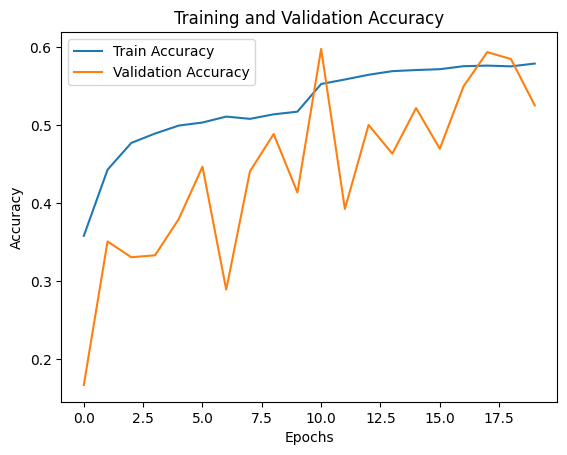

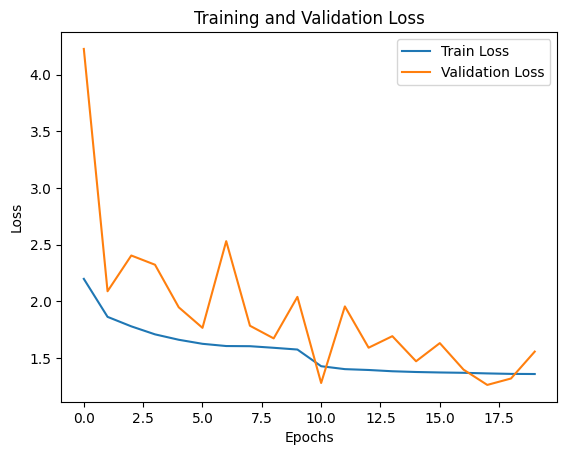

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Define the fine-tuned CNN architecture
def create_model2():
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32, 32, 3)),
        LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-4)),
        LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-4)),
        LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-4)),
        LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-4)),
        LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-4)),
        LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),

        # Classification Head
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, kernel_regularizer=regularizers.l2(1e-4)),
        LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.Dropout(0.6),
        layers.Dense(10, activation='softmax')
    ])

    # Compile the model with a learning rate schedule
    optimizer = optimizers.Adam(learning_rate=1e-3)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# Define a one-cycle learning rate scheduler without a class
def compute_one_cycle_lr(step, max_lr, total_steps):
    if step <= total_steps // 2:
        return max_lr * (step / (total_steps // 2))
    else:
        return max_lr * (1 - ((step - total_steps // 2) / (total_steps // 2)))

steps_per_epoch = len(x_train) // 64
max_lr = 0.01

def lr_schedule(epoch, lr):
    total_steps = steps_per_epoch * 30
    current_step = epoch * steps_per_epoch
    return compute_one_cycle_lr(current_step, max_lr, total_steps)

lr_scheduler = callbacks.LearningRateScheduler(lr_schedule)

In [ ]:
# Compile the model
model = create_model2()
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[lr_scheduler],
    verbose=1
)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.0939 - loss: 4.0043 - val_accuracy: 0.0958 - val_loss: 4.3670 - learning_rate: 0.0000e+00
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.2593 - loss: 2.4761 - val_accuracy: 0.4146 - val_loss: 1.7274 - learning_rate: 6.6667e-04
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.4538 - loss: 1.5736 - val_accuracy: 0.5303 - val_loss: 1.3814 - learning_rate: 0.0013
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5594 - loss: 1.2887 - val_accuracy: 0.5769 - val_loss: 1.2511 - learning_rate: 0.0020
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6015 - loss: 1.1717 - val_accuracy: 0.6238 - val_loss: 1.1196 - learning_rate: 0.0027
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6379 - loss: 1.0972 - val_accuracy: 0.6362 - val_loss: 1.1331 - learning_rate: 0.0033
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6658 - lo

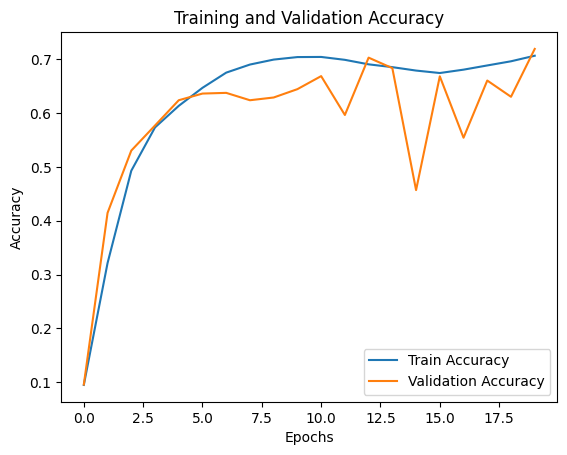

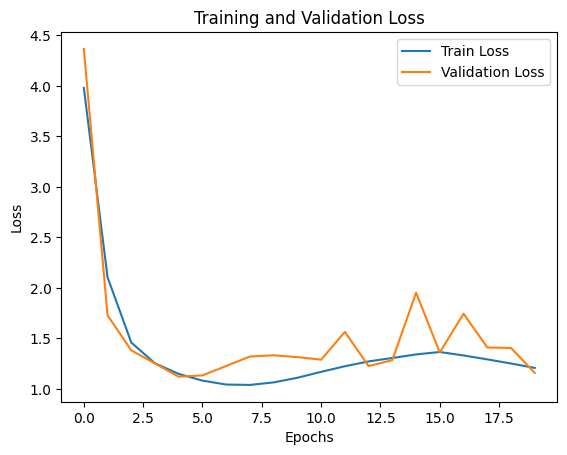

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Define the ultimate CNN architecture
def create_model3():
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32, 32, 3)),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-4)),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        # Second Convolutional Block
        layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-4)),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-4)),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        # Third Convolutional Block
        layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-4)),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-4)),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),

        # Fourth Convolutional Block (Optional for deeper networks)
        layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-4)),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),

        # Classification Head
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, kernel_regularizer=regularizers.l2(1e-4)),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.Dropout(0.6),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.15,
    fill_mode='nearest'
)

# Callbacks for optimization
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
model_checkpoint = callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)

In [ ]:
# Define a cosine annealing learning rate scheduler
def cosine_annealing(epoch):
    initial_lr = 0.001
    min_lr = 0.0001
    total_epochs = 30
    cosine_lr = min_lr + (initial_lr - min_lr) * (1 + tf.math.cos(epoch * 3.14159265359 / total_epochs)) / 2
    return cosine_lr.numpy()

lr_scheduler = callbacks.LearningRateScheduler(cosine_annealing)

In [ ]:
# Compile the model
model = create_model3()
model.compile(
    optimizer=optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    validation_data=(x_test, y_test),
    epochs=20,
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 73ms/step - accuracy: 0.2749 - loss: 2.5279 - val_accuracy: 0.3910 - val_loss: 2.0804 - learning_rate: 0.0010
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.5073 - loss: 1.5458 - val_accuracy: 0.5752 - val_loss: 1.4101 - learning_rate: 0.0010
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 55ms/step - accuracy: 0.6045 - loss: 1.3007 - val_accuracy: 0.6701 - val_loss: 1.1433 - learning_rate: 0.0010
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.6565 - loss: 1.1868 - val_accuracy: 0.7162 - val_loss: 1.0558 - learning_rate: 0.0010
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.6922 - loss: 1.1281 - val_accuracy: 0.7501 - val_loss: 0.9676 - learning_rate: 0.0010
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.7117 - loss: 1.1067 - val_accuracy: 0.7276 - val_loss: 1.0736 - learning_rate: 0.0010
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.7231 - loss: 1.0950

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Load and preprocess the MNIST dataset
(x_train1, y_train1), (x_test1, y_test1) = mnist.load_data()

# Expand dimensions to match the input shape of the model
x_train1 = x_train1.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test1 = x_test1.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train1 = tf.keras.utils.to_categorical(y_train1, 10)
y_test1 = tf.keras.utils.to_categorical(y_test1, 10)

In [ ]:
# Define the enhanced CNN architecture
def create_model4():
    model = models.Sequential([
        layers.Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(1024, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [ ]:
# Define a one-cycle learning rate scheduler
def compute_one_cycle_lr(step, max_lr, total_steps):
    if step <= total_steps // 2:
        return max_lr * (step / (total_steps // 2))
    else:
        return max_lr * (1 - ((step - total_steps // 2) / (total_steps // 2)))

steps_per_epoch = len(x_train1) // 64
max_lr = 0.01

In [ ]:
def lr_schedule(epoch, lr):
    total_steps = steps_per_epoch * 30  # 30 epochs
    current_step = epoch * steps_per_epoch
    return compute_one_cycle_lr(current_step, max_lr, total_steps)

lr_scheduler = callbacks.LearningRateScheduler(lr_schedule)

In [ ]:
# Compile the model
model = create_model4()
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the model
history = model.fit(
    x_train1, y_train1,
    epochs=20,
    batch_size=64,
    validation_data=(x_test1, y_test1),
    callbacks=[lr_scheduler],
    verbose=1
)

In [ ]:
# Evaluate the model
test_loss1, test_accuracy1 = model.evaluate(x_test1, y_test1, verbose=0)
print(f"Test Accuracy: {test_accuracy1:.2f}")

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
x = 4
y = 3
if x > y:
  x = x + y
  y = x - y

print(x)
print(y)

7
4
